# Opening HDF (.h5) files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy

import h5py

**Open the file using ```h5py.File()```:**

In [2]:
smap_ds = h5py.File('../data/satellite-data/smap-hdf5/SMAP_L4_SM_aup_20180420T030000_Vv3030_001.h5', 'r')

**Inspect what categories of data are in the HDF5 file:**

In [3]:
smap_ds.keys()

<KeysViewHDF5 ['Analysis_Data', 'Forecast_Data', 'Metadata', 'Observations_Data', 'cell_column', 'cell_lat', 'cell_lon', 'cell_row', 'time']>

**Here,```Analysis_Data``` is the key for the profile information:**

In [4]:
list(smap_ds['Analysis_Data'])

['sm_profile_analysis',
 'sm_profile_analysis_ensstd',
 'sm_rootzone_analysis',
 'sm_rootzone_analysis_ensstd',
 'sm_surface_analysis',
 'sm_surface_analysis_ensstd',
 'soil_temp_layer1_analysis',
 'soil_temp_layer1_analysis_ensstd',
 'surface_temp_analysis',
 'surface_temp_analysis_ensstd']

**```Observations_data``` give metadata on the satellite:**

In [5]:
list(smap_ds['Observations_Data'])

['tb_h_obs',
 'tb_h_obs_assim',
 'tb_h_obs_errstd',
 'tb_h_obs_time_sec',
 'tb_h_orbit_flag',
 'tb_h_resolution_flag',
 'tb_v_obs',
 'tb_v_obs_assim',
 'tb_v_obs_errstd',
 'tb_v_obs_time_sec',
 'tb_v_orbit_flag',
 'tb_v_resolution_flag']

**Extract the latitude and longitude data and the soil moisture values themselves:**

In [6]:
smap_lat = smap_ds['cell_lat'][()]
smap_lon = smap_ds['cell_lon'][()]
smap_data = smap_ds['Analysis_Data']['sm_profile_analysis'][()]

**Set all missing values (-9999) equal to NaN:**

In [7]:
smap_data[smap_data==-9999.]=np.nan

**Default plot is not very useful:**

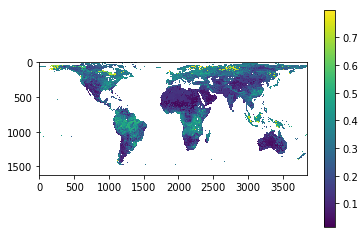

In [8]:
plt.imshow(smap_data)
plt.colorbar()

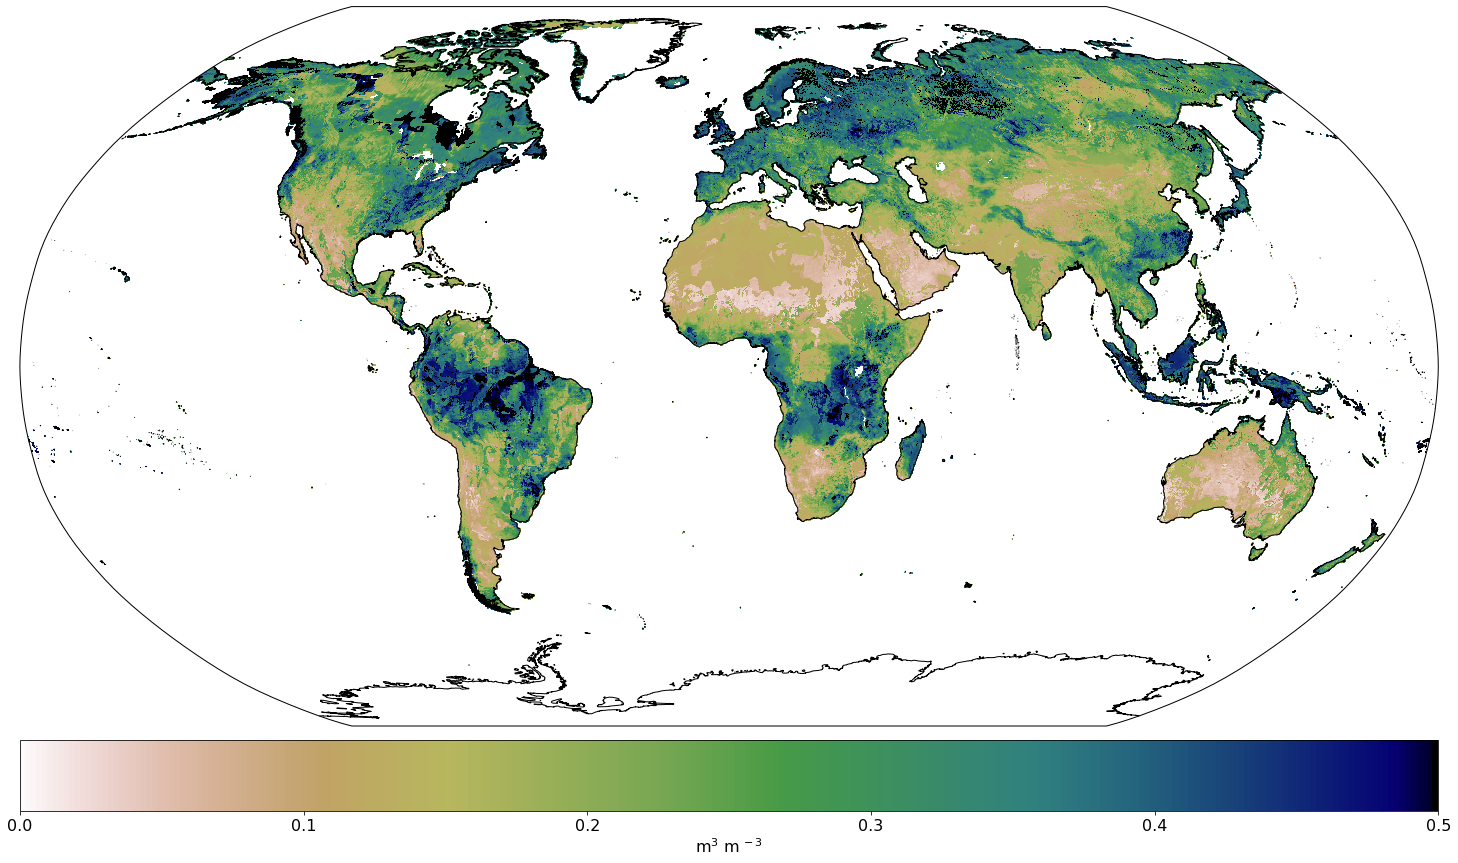

In [9]:
map_crs = cartopy.crs.Robinson()
data_crs = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(1,1, subplot_kw={'projection':map_crs})
fig.set_size_inches(20,20)

ax.coastlines(resolution='10m')

smap_plot = ax.pcolormesh(smap_lon,
                          smap_lat,
                          smap_data,
                          vmin=0,
                          vmax=0.5,
                          cmap='gist_earth_r',
                          transform=data_crs)

fig.tight_layout()

cbar = plt.colorbar(smap_plot, orientation='horizontal', fraction=0.1, pad=0.01)
cbar.set_label('m$^{3}$ m$^{\,-3}$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

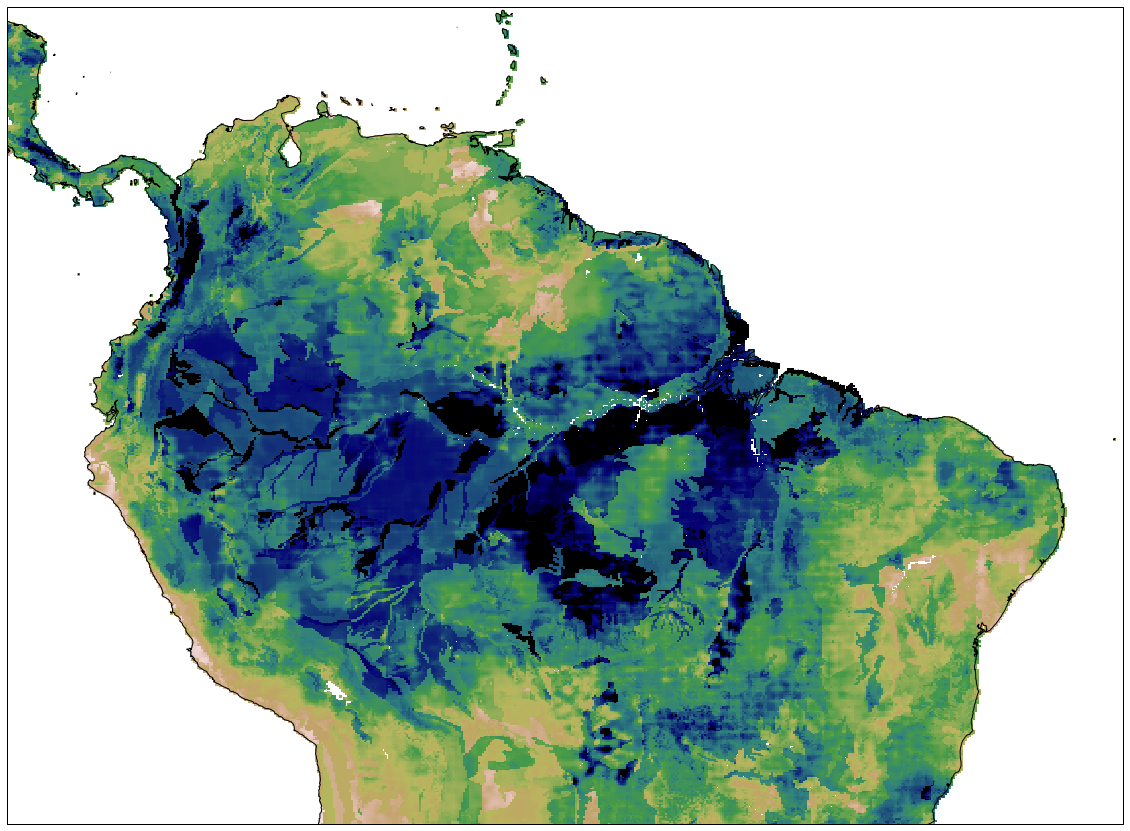

In [10]:
map_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(1,1, subplot_kw={'projection':map_crs})
fig.set_size_inches(20,20)

ax.coastlines(resolution='10m')

smap_plot = ax.pcolormesh(smap_lon,
                          smap_lat,
                          smap_data,
                          vmin=0,
                          vmax=0.5,
                          cmap='gist_earth_r',
                          transform=data_crs)

ax.set_extent([275,328,-20,15])